In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import export_text


In [2]:
ap_df = pd.read_csv("inq2022.csv")

In [3]:
ap_df.head()

,ETHNICITY,TERRITORY,ACADEMIC_INTEREST_1,ACADEMIC_INTEREST_2,Enroll,CONTACT_DATE,TOTAL_CONTACTS,SELF_INIT_CNTCTS,TRAVEL_INIT_CNTCTS,SOLICITED_CNTCTS,...,premiere,interest,stucar,init_span,int1rat,int2rat,hscrat,avg_income,distance,Instate
0,NaN,N,LAW,BUS,0,14-Sep-19,1,0,0,1,...,0,0,0,4,0.017183,0.02038,0.037652,NaN,NaN,N
1,C,7,NaN,NaN,0,15-Sep-19,1,0,0,1,...,0,0,1,19,0.017183,0.02038,0.037652,NaN,NaN,N
2,NaN,3,NaN,NaN,0,17-Feb-19,2,2,0,0,...,0,0,0,27,0.017183,0.02038,0.037652,NaN,NaN,N
3,C,5,MED,PEDU,0,15-Mar-19,3,2,1,0,...,0,0,1,34,0.017183,0.02038,0.037652,NaN,NaN,N
4,NaN,3,NaN,NaN,0,3-Apr-19,1,1,0,0,...,0,0,1,45,0.017183,0.02038,0.037652,NaN,NaN,N


In [4]:
ap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91482 entries, 0 to 91481
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ETHNICITY            71772 non-null  object 
 1   TERRITORY            91481 non-null  object 
 2   ACADEMIC_INTEREST_1  44283 non-null  object 
 3   ACADEMIC_INTEREST_2  24879 non-null  object 
 4   Enroll               91482 non-null  int64  
 5   CONTACT_DATE         91482 non-null  object 
 6   TOTAL_CONTACTS       91482 non-null  int64  
 7   SELF_INIT_CNTCTS     91482 non-null  int64  
 8   TRAVEL_INIT_CNTCTS   91482 non-null  int64  
 9   SOLICITED_CNTCTS     91482 non-null  int64  
 10  REFERRAL_CNTCTS      91482 non-null  int64  
 11  CAMPUS_VISIT         91482 non-null  int64  
 12  CONTACT_CODE1        91339 non-null  object 
 13  LEVEL_YEAR           91482 non-null  object 
 14  IRSCHOOL             76172 non-null  object 
 15  satscore             27003 non-null 

In [5]:
ap_df.describe(include = 'all')

,ETHNICITY,TERRITORY,ACADEMIC_INTEREST_1,ACADEMIC_INTEREST_2,Enroll,CONTACT_DATE,TOTAL_CONTACTS,SELF_INIT_CNTCTS,TRAVEL_INIT_CNTCTS,SOLICITED_CNTCTS,...,premiere,interest,stucar,init_span,int1rat,int2rat,hscrat,avg_income,distance,Instate
count,71772,91481,44283,24879,91482.000000,91482,91482.000000,91482.000000,91482.000000,91482.000000,...,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,70553.000000,72014.000000,91482
unique,7,11,211,208,NaN,960,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,C,2,MED,MED,NaN,30-Jun-21,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
freq,31750,14621,6113,2350,NaN,6644,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56760
mean,NaN,NaN,NaN,NaN,0.031350,NaN,2.166098,1.214119,0.364815,0.547222,...,0.028913,0.053639,0.489922,19.686157,0.037091,0.042896,0.037652,47315.334146,380.427645,NaN
std,NaN,NaN,NaN,NaN,0.174264,NaN,1.852537,1.666529,0.557067,0.649426,...,0.167562,0.242052,0.499901,8.722109,0.024026,0.025244,0.057399,20608.888129,397.978831,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-216.000000,0.000000,0.000000,0.000000,4940.000000,0.417124,NaN
25%,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,13.000000,0.017183,0.020380,0.000000,32045.000000,114.471414,NaN
50%,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,19.000000,0.042105,0.056670,0.033333,42324.000000,183.546674,NaN
75%,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,25.000000,0.049270,0.056670,0.048035,57314.000000,539.432855,NaN


In [6]:
ap_df.isnull().sum()/len(ap_df)

ETHNICITY              0.215452
TERRITORY              0.000011
ACADEMIC_INTEREST_1    0.515938
ACADEMIC_INTEREST_2    0.728045
Enroll                 0.000000
CONTACT_DATE           0.000000
TOTAL_CONTACTS         0.000000
SELF_INIT_CNTCTS       0.000000
TRAVEL_INIT_CNTCTS     0.000000
SOLICITED_CNTCTS       0.000000
REFERRAL_CNTCTS        0.000000
CAMPUS_VISIT           0.000000
CONTACT_CODE1          0.001563
LEVEL_YEAR             0.000000
IRSCHOOL               0.167355
satscore               0.704827
sex                    0.041899
mailq                  0.000000
telecq                 0.774797
premiere               0.000000
interest               0.000000
stucar                 0.000000
init_span              0.000000
int1rat                0.000000
int2rat                0.000000
hscrat                 0.000000
avg_income             0.228777
distance               0.212807
Instate                0.000000
dtype: float64

In [7]:
ap_df = ap_df.drop(columns=['ACADEMIC_INTEREST_1','ACADEMIC_INTEREST_2','IRSCHOOL','CONTACT_CODE1','CONTACT_DATE'])

In [8]:
ap_df.describe(include='all')

,ETHNICITY,TERRITORY,Enroll,TOTAL_CONTACTS,SELF_INIT_CNTCTS,TRAVEL_INIT_CNTCTS,SOLICITED_CNTCTS,REFERRAL_CNTCTS,CAMPUS_VISIT,LEVEL_YEAR,...,premiere,interest,stucar,init_span,int1rat,int2rat,hscrat,avg_income,distance,Instate
count,71772,91481,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482,...,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,70553.000000,72014.000000,91482
unique,7,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,C,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FR22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
freq,31750,14621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91482,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56760
mean,NaN,NaN,0.031350,2.166098,1.214119,0.364815,0.547222,0.039899,0.034673,NaN,...,0.028913,0.053639,0.489922,19.686157,0.037091,0.042896,0.037652,47315.334146,380.427645,NaN
std,NaN,NaN,0.174264,1.852537,1.666529,0.557067,0.649426,0.226191,0.187322,NaN,...,0.167562,0.242052,0.499901,8.722109,0.024026,0.025244,0.057399,20608.888129,397.978831,NaN
min,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,-216.000000,0.000000,0.000000,0.000000,4940.000000,0.417124,NaN
25%,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,13.000000,0.017183,0.020380,0.000000,32045.000000,114.471414,NaN
50%,NaN,NaN,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,19.000000,0.042105,0.056670,0.033333,42324.000000,183.546674,NaN
75%,NaN,NaN,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,1.000000,25.000000,0.049270,0.056670,0.048035,57314.000000,539.432855,NaN


In [9]:
ap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91482 entries, 0 to 91481
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ETHNICITY           71772 non-null  object 
 1   TERRITORY           91481 non-null  object 
 2   Enroll              91482 non-null  int64  
 3   TOTAL_CONTACTS      91482 non-null  int64  
 4   SELF_INIT_CNTCTS    91482 non-null  int64  
 5   TRAVEL_INIT_CNTCTS  91482 non-null  int64  
 6   SOLICITED_CNTCTS    91482 non-null  int64  
 7   REFERRAL_CNTCTS     91482 non-null  int64  
 8   CAMPUS_VISIT        91482 non-null  int64  
 9   LEVEL_YEAR          91482 non-null  object 
 10  satscore            27003 non-null  float64
 11  sex                 87649 non-null  float64
 12  mailq               91482 non-null  int64  
 13  telecq              20602 non-null  float64
 14  premiere            91482 non-null  int64  
 15  interest            91482 non-null  int64  
 16  stuc

In [10]:
ap_df.isna().sum()/len(ap_df)

ETHNICITY             0.215452
TERRITORY             0.000011
Enroll                0.000000
TOTAL_CONTACTS        0.000000
SELF_INIT_CNTCTS      0.000000
TRAVEL_INIT_CNTCTS    0.000000
SOLICITED_CNTCTS      0.000000
REFERRAL_CNTCTS       0.000000
CAMPUS_VISIT          0.000000
LEVEL_YEAR            0.000000
satscore              0.704827
sex                   0.041899
mailq                 0.000000
telecq                0.774797
premiere              0.000000
interest              0.000000
stucar                0.000000
init_span             0.000000
int1rat               0.000000
int2rat               0.000000
hscrat                0.000000
avg_income            0.228777
distance              0.212807
Instate               0.000000
dtype: float64

In [11]:
ap_df = ap_df.drop(columns=['satscore','telecq'])

In [12]:
ap_df = ap_df.drop(columns=['LEVEL_YEAR'])

In [13]:
ap_df.Enroll.value_counts()

0    88614
1     2868
Name: Enroll, dtype: int64

In [14]:
cat_columns = ['ETHNICITY','TERRITORY','Instate']

In [15]:
for col in cat_columns:
    print(ap_df[col].value_counts())
print(len(ap_df))    
print(ap_df.isna().sum())

C    31750
N    14793
H     9989
B     8477
A     3336
O     2705
I      722
Name: ETHNICITY, dtype: int64
2    14621
5    14033
7    11796
4    10611
3     9261
1     9219
6     9037
8     6644
A     3284
N     2970
0        5
Name: TERRITORY, dtype: int64
Y    56760
N    34722
Name: Instate, dtype: int64
91482
ETHNICITY             19710
TERRITORY                 1
Enroll                    0
TOTAL_CONTACTS            0
SELF_INIT_CNTCTS          0
TRAVEL_INIT_CNTCTS        0
SOLICITED_CNTCTS          0
REFERRAL_CNTCTS           0
CAMPUS_VISIT              0
sex                    3833
mailq                     0
premiere                  0
interest                  0
stucar                    0
init_span                 0
int1rat                   0
int2rat                   0
hscrat                    0
avg_income            20929
distance              19468
Instate                   0
dtype: int64


In [16]:
ap_df['ETHNICITY'] = ap_df['ETHNICITY'].fillna('C') ## Most frequent occurence
ap_df['TERRITORY'] = ap_df['TERRITORY'].fillna('0') ## Null % is close to 0, so filling with least occurence value as it doesn't have much impact on the model
ap_df['sex'] = ap_df['sex'].fillna(1) ## Highest occurence
ap_df['avg_income'] = ap_df['avg_income'].fillna(ap_df['avg_income'].mean()) ## Right skewed so filling nulls with mean
ap_df['distance'] = ap_df['distance'].fillna(ap_df['distance'].mean()) ## Right skewed so filling nulls with mean

In [17]:
ap_df =pd.get_dummies(ap_df, drop_first=True)

ap_df_tree = ap_df.copy() ## Making a replica for Decision Tree Model

ap_df.describe()

,Enroll,TOTAL_CONTACTS,SELF_INIT_CNTCTS,TRAVEL_INIT_CNTCTS,SOLICITED_CNTCTS,REFERRAL_CNTCTS,CAMPUS_VISIT,sex,mailq,premiere,...,TERRITORY_2,TERRITORY_3,TERRITORY_4,TERRITORY_5,TERRITORY_6,TERRITORY_7,TERRITORY_8,TERRITORY_A,TERRITORY_N,Instate_Y
count,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,...,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000
mean,0.031350,2.166098,1.214119,0.364815,0.547222,0.039899,0.034673,0.647045,4.084377,0.028913,...,0.159824,0.101233,0.115990,0.153396,0.098784,0.128943,0.072626,0.035898,0.032465,0.620450
std,0.174264,1.852537,1.666529,0.557067,0.649426,0.226191,0.187322,0.477891,1.440329,0.167562,...,0.366445,0.301639,0.320215,0.360371,0.298374,0.335139,0.259524,0.186036,0.177234,0.485278
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,58.000000,56.000000,8.000000,9.000000,5.000000,2.000000,1.000000,5.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
ap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91482 entries, 0 to 91481
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Enroll              91482 non-null  int64  
 1   TOTAL_CONTACTS      91482 non-null  int64  
 2   SELF_INIT_CNTCTS    91482 non-null  int64  
 3   TRAVEL_INIT_CNTCTS  91482 non-null  int64  
 4   SOLICITED_CNTCTS    91482 non-null  int64  
 5   REFERRAL_CNTCTS     91482 non-null  int64  
 6   CAMPUS_VISIT        91482 non-null  int64  
 7   sex                 91482 non-null  float64
 8   mailq               91482 non-null  int64  
 9   premiere            91482 non-null  int64  
 10  interest            91482 non-null  int64  
 11  stucar              91482 non-null  int64  
 12  init_span           91482 non-null  int64  
 13  int1rat             91482 non-null  float64
 14  int2rat             91482 non-null  float64
 15  hscrat              91482 non-null  float64
 16  avg_

In [19]:
ap_df[['TOTAL_CONTACTS','SELF_INIT_CNTCTS','TRAVEL_INIT_CNTCTS',
            'SOLICITED_CNTCTS','REFERRAL_CNTCTS','CAMPUS_VISIT',
            'sex','mailq','premiere','interest','stucar','init_span','int1rat',
            'int2rat','hscrat','avg_income','distance']].skew(axis = 0, skipna = True)

TOTAL_CONTACTS        3.062389
SELF_INIT_CNTCTS      2.916263
TRAVEL_INIT_CNTCTS    1.418514
SOLICITED_CNTCTS      1.201013
REFERRAL_CNTCTS       7.572001
CAMPUS_VISIT          5.452054
sex                  -0.615406
mailq                -1.105478
premiere              5.622951
interest              4.817932
stucar                0.040323
init_span             0.758461
int1rat               3.496845
int2rat               3.215683
hscrat                7.021978
avg_income            1.432743
distance              2.565859
dtype: float64

array([[<AxesSubplot:title={'center':'TOTAL_CONTACTS'}>,
        <AxesSubplot:title={'center':'SELF_INIT_CNTCTS'}>,
        <AxesSubplot:title={'center':'TRAVEL_INIT_CNTCTS'}>,
        <AxesSubplot:title={'center':'SOLICITED_CNTCTS'}>],
       [<AxesSubplot:title={'center':'REFERRAL_CNTCTS'}>,
        <AxesSubplot:title={'center':'CAMPUS_VISIT'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'mailq'}>],
       [<AxesSubplot:title={'center':'premiere'}>,
        <AxesSubplot:title={'center':'interest'}>,
        <AxesSubplot:title={'center':'stucar'}>,
        <AxesSubplot:title={'center':'init_span'}>],
       [<AxesSubplot:title={'center':'int1rat'}>,
        <AxesSubplot:title={'center':'int2rat'}>,
        <AxesSubplot:title={'center':'hscrat'}>,
        <AxesSubplot:title={'center':'avg_income'}>],
       [<AxesSubplot:title={'center':'distance'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

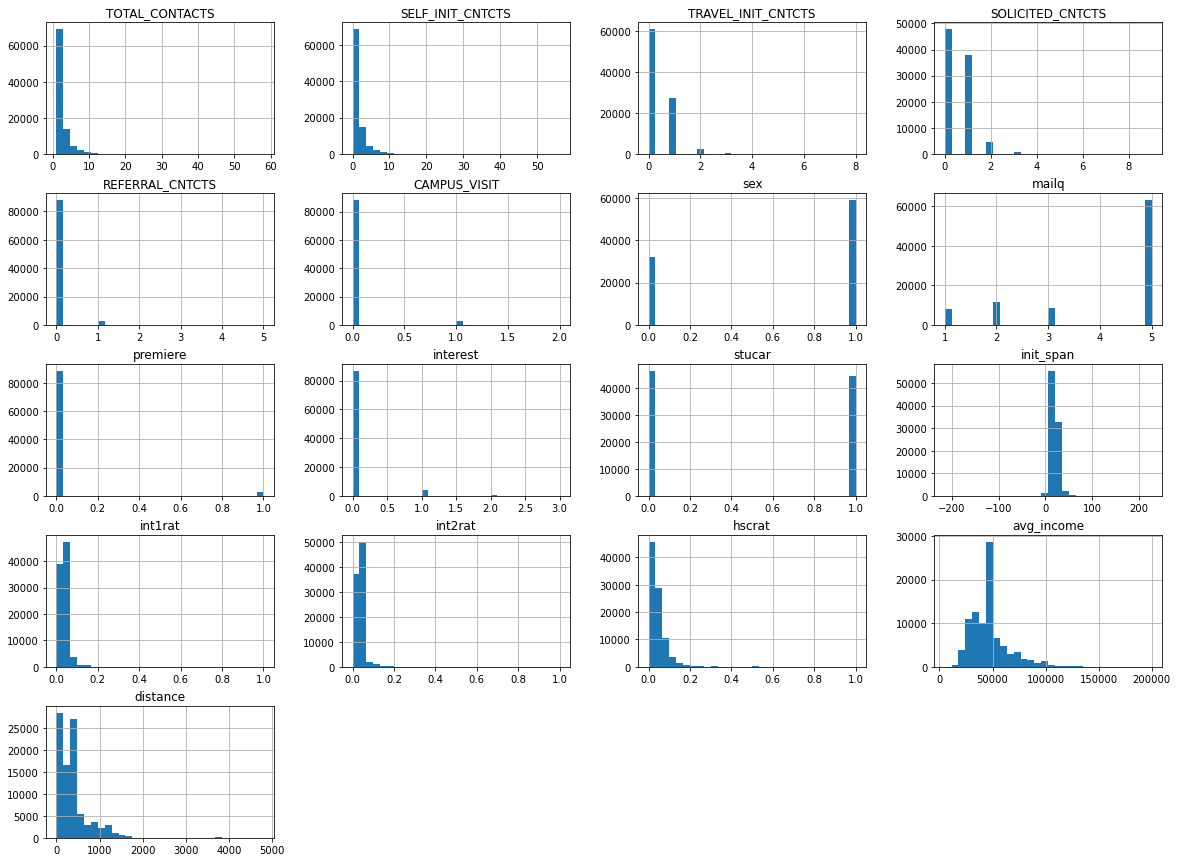

In [20]:
ap_df[['TOTAL_CONTACTS','SELF_INIT_CNTCTS','TRAVEL_INIT_CNTCTS',
            'SOLICITED_CNTCTS','REFERRAL_CNTCTS','CAMPUS_VISIT',
            'sex','mailq','premiere','interest','stucar','init_span','int1rat',
            'int2rat','hscrat','avg_income','distance']].hist(bins=30, figsize=(20, 15))

In [21]:
ap_df['TOTAL_CONTACTS'] = np.where(ap_df['TOTAL_CONTACTS']>0,1,0) 
ap_df['SELF_INIT_CNTCTS'] = np.where(ap_df['SELF_INIT_CNTCTS']>0,1,0)

array([[<AxesSubplot:title={'center':'TOTAL_CONTACTS'}>,
        <AxesSubplot:title={'center':'SELF_INIT_CNTCTS'}>,
        <AxesSubplot:title={'center':'TRAVEL_INIT_CNTCTS'}>,
        <AxesSubplot:title={'center':'SOLICITED_CNTCTS'}>,
        <AxesSubplot:title={'center':'REFERRAL_CNTCTS'}>,
        <AxesSubplot:title={'center':'CAMPUS_VISIT'}>],
       [<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'mailq'}>,
        <AxesSubplot:title={'center':'premiere'}>,
        <AxesSubplot:title={'center':'interest'}>,
        <AxesSubplot:title={'center':'stucar'}>,
        <AxesSubplot:title={'center':'init_span'}>],
       [<AxesSubplot:title={'center':'int1rat'}>,
        <AxesSubplot:title={'center':'int2rat'}>,
        <AxesSubplot:title={'center':'hscrat'}>,
        <AxesSubplot:title={'center':'avg_income'}>,
        <AxesSubplot:title={'center':'distance'}>,
        <AxesSubplot:title={'center':'ETHNICITY_B'}>],
       [<AxesSubplot:title={'center':'ETHNIC

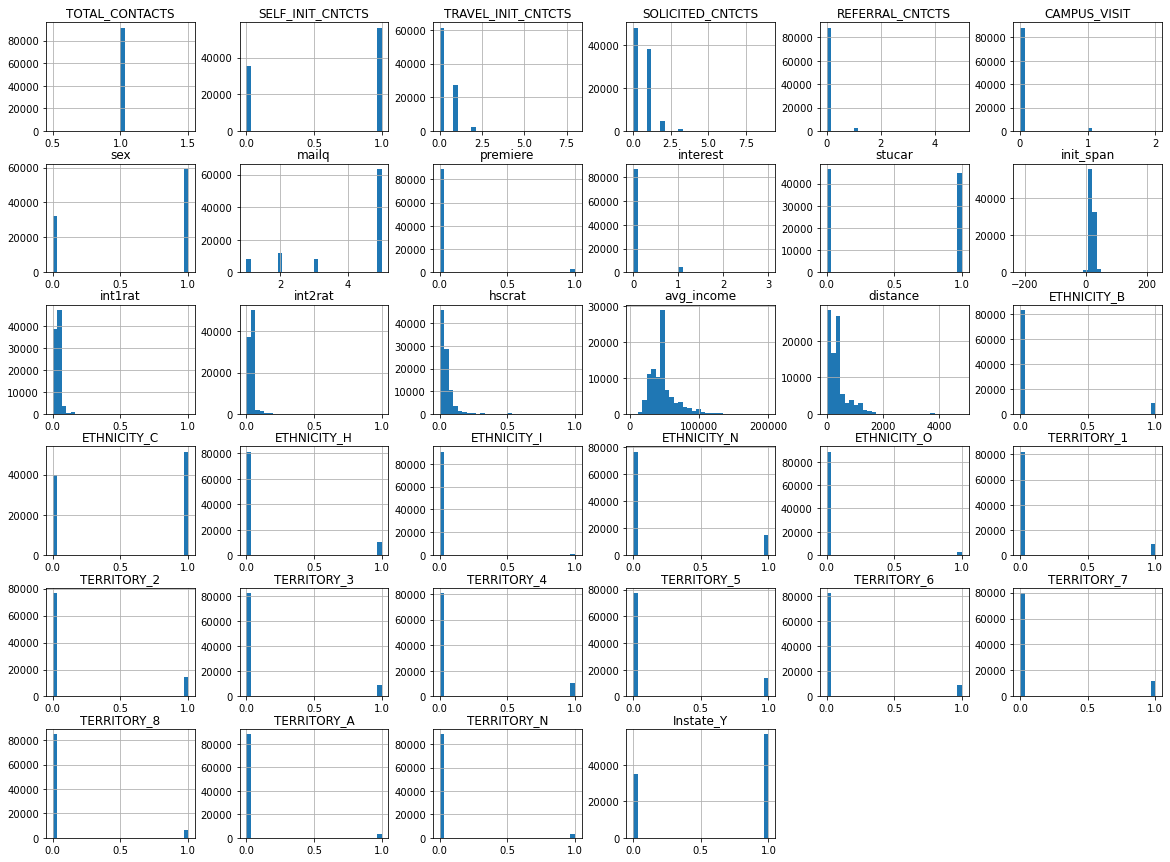

In [22]:
ap_df.drop(columns=['Enroll']).hist(bins=30, figsize=(20, 15))

Considering VIF threshold as 10

In [23]:
ap_vif = pd.DataFrame()
ap_vif["feature"] = ap_df.drop(columns=['Enroll']).columns
  
ap_vif["VIF"] = [variance_inflation_factor(ap_df.drop(columns=['Enroll']).values, i)
                          for i in range(len(ap_df.drop(columns=['Enroll']).columns))]
  
print(ap_vif)

               feature           VIF
0       TOTAL_CONTACTS  15333.917249
1     SELF_INIT_CNTCTS      1.255323
2   TRAVEL_INIT_CNTCTS      2.229213
3     SOLICITED_CNTCTS      1.361185
4      REFERRAL_CNTCTS      1.032009
5         CAMPUS_VISIT      1.104367
6                  sex      1.009589
7                mailq      2.139608
8             premiere      1.085188
9             interest      1.074570
10              stucar      1.212083
11           init_span      1.188689
12             int1rat      1.770830
13             int2rat      1.997216
14              hscrat      1.116251
15          avg_income      1.087348
16            distance      1.702228
17         ETHNICITY_B      3.249954
18         ETHNICITY_C      7.277017
19         ETHNICITY_H      3.607385
20         ETHNICITY_I      1.216751
21         ETHNICITY_N      4.604918
22         ETHNICITY_O      1.770288
23         TERRITORY_1   1383.102254
24         TERRITORY_2   2048.971680
25         TERRITORY_3   1388.664048
2

In [24]:
ap_df.corr()

,Enroll,TOTAL_CONTACTS,SELF_INIT_CNTCTS,TRAVEL_INIT_CNTCTS,SOLICITED_CNTCTS,REFERRAL_CNTCTS,CAMPUS_VISIT,sex,mailq,premiere,...,TERRITORY_2,TERRITORY_3,TERRITORY_4,TERRITORY_5,TERRITORY_6,TERRITORY_7,TERRITORY_8,TERRITORY_A,TERRITORY_N,Instate_Y
Enroll,1.000000,NaN,0.002768,-0.002510,0.003049,-0.002615,0.002530,-0.000752,0.001089,0.000029,...,-0.034814,0.026549,0.006923,-0.025925,0.018855,-0.009510,0.039569,-0.022576,-0.025522,0.017004
TOTAL_CONTACTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SELF_INIT_CNTCTS,0.002768,NaN,1.000000,-0.088618,-0.084685,-0.063337,0.146379,-0.020042,0.034409,0.136453,...,-0.013582,0.001058,-0.005570,-0.005471,0.003088,0.002115,0.010588,0.007552,0.005035,0.088179
TRAVEL_INIT_CNTCTS,-0.002510,NaN,-0.088618,1.000000,-0.339020,-0.045769,0.002808,0.020223,-0.706166,0.061138,...,0.003644,-0.002508,0.002203,0.019034,-0.000384,-0.012082,-0.006565,-0.009077,0.003155,0.223375
SOLICITED_CNTCTS,0.003049,NaN,-0.084685,-0.339020,1.000000,-0.071764,-0.026848,0.047699,0.305246,0.028990,...,0.000141,0.000847,0.001547,-0.003231,-0.006558,0.007934,0.001119,0.009041,-0.010661,-0.141356
REFERRAL_CNTCTS,-0.002615,NaN,-0.063337,-0.045769,-0.071764,1.000000,0.016109,0.007310,0.035366,0.053780,...,-0.006773,-0.000881,0.001454,-0.011385,0.000395,0.001926,0.007246,0.005448,-0.000681,0.017165
CAMPUS_VISIT,0.002530,NaN,0.146379,0.002808,-0.026848,0.016109,1.000000,0.001902,-0.145760,0.081942,...,-0.001109,-0.007566,0.002748,-0.003493,-0.005739,-0.000698,0.004863,0.006942,0.004287,0.048453
sex,-0.000752,NaN,-0.020042,0.020223,0.047699,0.007310,0.001902,1.000000,-0.017922,0.008950,...,-0.001526,0.002253,-0.006129,0.005967,0.005340,-0.001539,-0.003435,-0.000233,-0.002804,-0.026504
mailq,0.001089,NaN,0.034409,-0.706166,0.305246,0.035366,-0.145760,-0.017922,1.000000,-0.054767,...,-0.000387,0.007462,-0.005222,-0.012595,-0.001056,0.010025,0.006942,0.007543,-0.006192,-0.211838
premiere,0.000029,NaN,0.136453,0.061138,0.028990,0.053780,0.081942,0.008950,-0.054767,1.000000,...,-0.009388,0.000917,0.004932,-0.005926,-0.001155,-0.002347,0.005506,0.004927,0.005569,0.094090


In [25]:
ap_df = ap_df.drop(columns=['TOTAL_CONTACTS']) ### Highest VIF value

In [26]:
ap_vif = pd.DataFrame()
ap_vif["feature"] = ap_df.drop(columns=['Enroll']).columns
  
ap_vif["VIF"] = [variance_inflation_factor(ap_df.drop(columns=['Enroll']).values, i)
                          for i in range(len(ap_df.drop(columns=['Enroll']).columns))]
  
print(ap_vif)

               feature        VIF
0     SELF_INIT_CNTCTS   3.261982
1   TRAVEL_INIT_CNTCTS   3.182225
2     SOLICITED_CNTCTS   2.327651
3      REFERRAL_CNTCTS   1.064120
4         CAMPUS_VISIT   1.142205
5                  sex   2.860240
6                mailq  19.318135
7             premiere   1.117444
8             interest   1.127194
9               stucar   2.376190
10           init_span   7.239907
11             int1rat   5.991301
12             int2rat   7.763877
13              hscrat   1.596551
14          avg_income   8.517485
15            distance   3.675792
16         ETHNICITY_B   3.575935
17         ETHNICITY_C  16.603714
18         ETHNICITY_H   4.044292
19         ETHNICITY_I   1.225999
20         ETHNICITY_N   5.483890
21         ETHNICITY_O   1.822754
22         TERRITORY_1   8.473207
23         TERRITORY_2  13.203569
24         TERRITORY_3   8.536427
25         TERRITORY_4   9.851917
26         TERRITORY_5  12.786580
27         TERRITORY_6   8.488663
28         TER

In [27]:
ap_df.corr()

,Enroll,SELF_INIT_CNTCTS,TRAVEL_INIT_CNTCTS,SOLICITED_CNTCTS,REFERRAL_CNTCTS,CAMPUS_VISIT,sex,mailq,premiere,interest,...,TERRITORY_2,TERRITORY_3,TERRITORY_4,TERRITORY_5,TERRITORY_6,TERRITORY_7,TERRITORY_8,TERRITORY_A,TERRITORY_N,Instate_Y
Enroll,1.000000,0.002768,-0.002510,0.003049,-0.002615,0.002530,-0.000752,0.001089,0.000029,0.002375,...,-0.034814,0.026549,0.006923,-0.025925,0.018855,-0.009510,0.039569,-0.022576,-0.025522,0.017004
SELF_INIT_CNTCTS,0.002768,1.000000,-0.088618,-0.084685,-0.063337,0.146379,-0.020042,0.034409,0.136453,0.116302,...,-0.013582,0.001058,-0.005570,-0.005471,0.003088,0.002115,0.010588,0.007552,0.005035,0.088179
TRAVEL_INIT_CNTCTS,-0.002510,-0.088618,1.000000,-0.339020,-0.045769,0.002808,0.020223,-0.706166,0.061138,0.105864,...,0.003644,-0.002508,0.002203,0.019034,-0.000384,-0.012082,-0.006565,-0.009077,0.003155,0.223375
SOLICITED_CNTCTS,0.003049,-0.084685,-0.339020,1.000000,-0.071764,-0.026848,0.047699,0.305246,0.028990,-0.008986,...,0.000141,0.000847,0.001547,-0.003231,-0.006558,0.007934,0.001119,0.009041,-0.010661,-0.141356
REFERRAL_CNTCTS,-0.002615,-0.063337,-0.045769,-0.071764,1.000000,0.016109,0.007310,0.035366,0.053780,0.026997,...,-0.006773,-0.000881,0.001454,-0.011385,0.000395,0.001926,0.007246,0.005448,-0.000681,0.017165
CAMPUS_VISIT,0.002530,0.146379,0.002808,-0.026848,0.016109,1.000000,0.001902,-0.145760,0.081942,0.116651,...,-0.001109,-0.007566,0.002748,-0.003493,-0.005739,-0.000698,0.004863,0.006942,0.004287,0.048453
sex,-0.000752,-0.020042,0.020223,0.047699,0.007310,0.001902,1.000000,-0.017922,0.008950,-0.000950,...,-0.001526,0.002253,-0.006129,0.005967,0.005340,-0.001539,-0.003435,-0.000233,-0.002804,-0.026504
mailq,0.001089,0.034409,-0.706166,0.305246,0.035366,-0.145760,-0.017922,1.000000,-0.054767,-0.155676,...,-0.000387,0.007462,-0.005222,-0.012595,-0.001056,0.010025,0.006942,0.007543,-0.006192,-0.211838
premiere,0.000029,0.136453,0.061138,0.028990,0.053780,0.081942,0.008950,-0.054767,1.000000,0.139912,...,-0.009388,0.000917,0.004932,-0.005926,-0.001155,-0.002347,0.005506,0.004927,0.005569,0.094090
interest,0.002375,0.116302,0.105864,-0.008986,0.026997,0.116651,-0.000950,-0.155676,0.139912,1.000000,...,-0.007796,0.002583,-0.001433,0.006552,0.005640,0.000711,-0.006504,-0.002950,-0.002117,0.061184


In [28]:
ap_df = ap_df.drop(columns=['mailq']) ### Highest VIF value

In [29]:
ap_vif = pd.DataFrame()
ap_vif["feature"] = ap_df.drop(columns=['Enroll']).columns
  
ap_vif["VIF"] = [variance_inflation_factor(ap_df.drop(columns=['Enroll']).values, i)
                          for i in range(len(ap_df.drop(columns=['Enroll']).columns))]
  
print(ap_vif)

               feature        VIF
0     SELF_INIT_CNTCTS   3.259409
1   TRAVEL_INIT_CNTCTS   1.884835
2     SOLICITED_CNTCTS   2.300752
3      REFERRAL_CNTCTS   1.063541
4         CAMPUS_VISIT   1.103016
5                  sex   2.859994
6             premiere   1.117319
7             interest   1.117409
8               stucar   2.370017
9            init_span   7.238982
10             int1rat   5.989097
11             int2rat   7.763385
12              hscrat   1.596093
13          avg_income   8.511503
14            distance   3.674862
15         ETHNICITY_B   3.575876
16         ETHNICITY_C  16.603396
17         ETHNICITY_H   4.044156
18         ETHNICITY_I   1.225993
19         ETHNICITY_N   5.483823
20         ETHNICITY_O   1.822603
21         TERRITORY_1   6.225564
22         TERRITORY_2   9.609857
23         TERRITORY_3   6.235460
24         TERRITORY_4   7.253594
25         TERRITORY_5   9.334568
26         TERRITORY_6   6.268878
27         TERRITORY_7   7.946175
28         TER

## Regression Model

In [30]:
ap_X_train, ap_X_val, ap_y_train, ap_y_val = train_test_split(ap_df.drop(columns=['Enroll']),ap_df['Enroll'], test_size=0.3,random_state=0)
ap_log_reg = sm.Logit(ap_y_train, ap_X_train).fit()
print(ap_log_reg.summary())


Optimization terminated successfully.
         Current function value: 0.130450
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 Enroll   No. Observations:                64037
Model:                          Logit   Df Residuals:                    64005
Method:                           MLE   Df Model:                           31
Date:                Tue, 07 Feb 2023   Pseudo R-squ.:                 0.05640
Time:                        21:14:28   Log-Likelihood:                -8353.6
converged:                       True   LL-Null:                       -8852.9
Covariance Type:            nonrobust   LLR p-value:                5.854e-190
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
SELF_INIT_CNTCTS      -0.0074      0.053     -0.140      0.889      -0.111       0.096
TRAV

In [31]:
ap_prediction_prob = ap_log_reg.predict(ap_X_val)
ap_prediction = list(map(round, ap_prediction_prob))
confusion_matrix(ap_y_val,ap_prediction)

array([[26563,     0],
       [  882,     0]])

In [32]:
lr_auc = roc_auc_score(ap_y_val, ap_prediction_prob)
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Logistic: ROC AUC=0.685


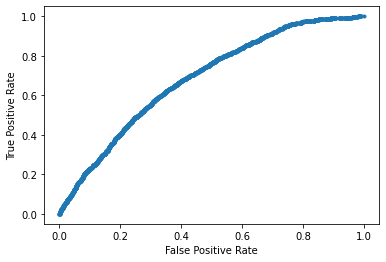

In [33]:
lr_fpr, lr_tpr, _ = roc_curve(ap_y_val, ap_prediction_prob)
plt.plot(lr_fpr, lr_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Tree Model

In [34]:
ap_X_train, ap_X_val, ap_y_train, ap_y_val = train_test_split(ap_df_tree.drop(columns=['Enroll']),ap_df_tree['Enroll'], test_size=0.3,random_state=0)
ap_dtree = tree.DecisionTreeClassifier(max_depth=4,min_samples_split=30)
ap_dtree = ap_dtree.fit(ap_X_train, ap_y_train)

In [35]:
ap_r = export_text(ap_dtree, feature_names=list(ap_X_train.columns.values))
print(ap_r)

|--- ETHNICITY_N <= 0.50
|   |--- TERRITORY_2 <= 0.50
|   |   |--- TERRITORY_5 <= 0.50
|   |   |   |--- TERRITORY_N <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- TERRITORY_N >  0.50
|   |   |   |   |--- class: 0
|   |   |--- TERRITORY_5 >  0.50
|   |   |   |--- distance <= 1.68
|   |   |   |   |--- class: 1
|   |   |   |--- distance >  1.68
|   |   |   |   |--- class: 0
|   |--- TERRITORY_2 >  0.50
|   |   |--- distance <= 2.88
|   |   |   |--- class: 0
|   |   |--- distance >  2.88
|   |   |   |--- SELF_INIT_CNTCTS <= 8.50
|   |   |   |   |--- class: 0
|   |   |   |--- SELF_INIT_CNTCTS >  8.50
|   |   |   |   |--- class: 0
|--- ETHNICITY_N >  0.50
|   |--- distance <= 2.36
|   |   |--- class: 0
|   |--- distance >  2.36
|   |   |--- int2rat <= 0.05
|   |   |   |--- distance <= 1252.60
|   |   |   |   |--- class: 0
|   |   |   |--- distance >  1252.60
|   |   |   |   |--- class: 0
|   |   |--- int2rat >  0.05
|   |   |   |--- distance <= 161.43
|   |   |   |   |--- class: 0
| 

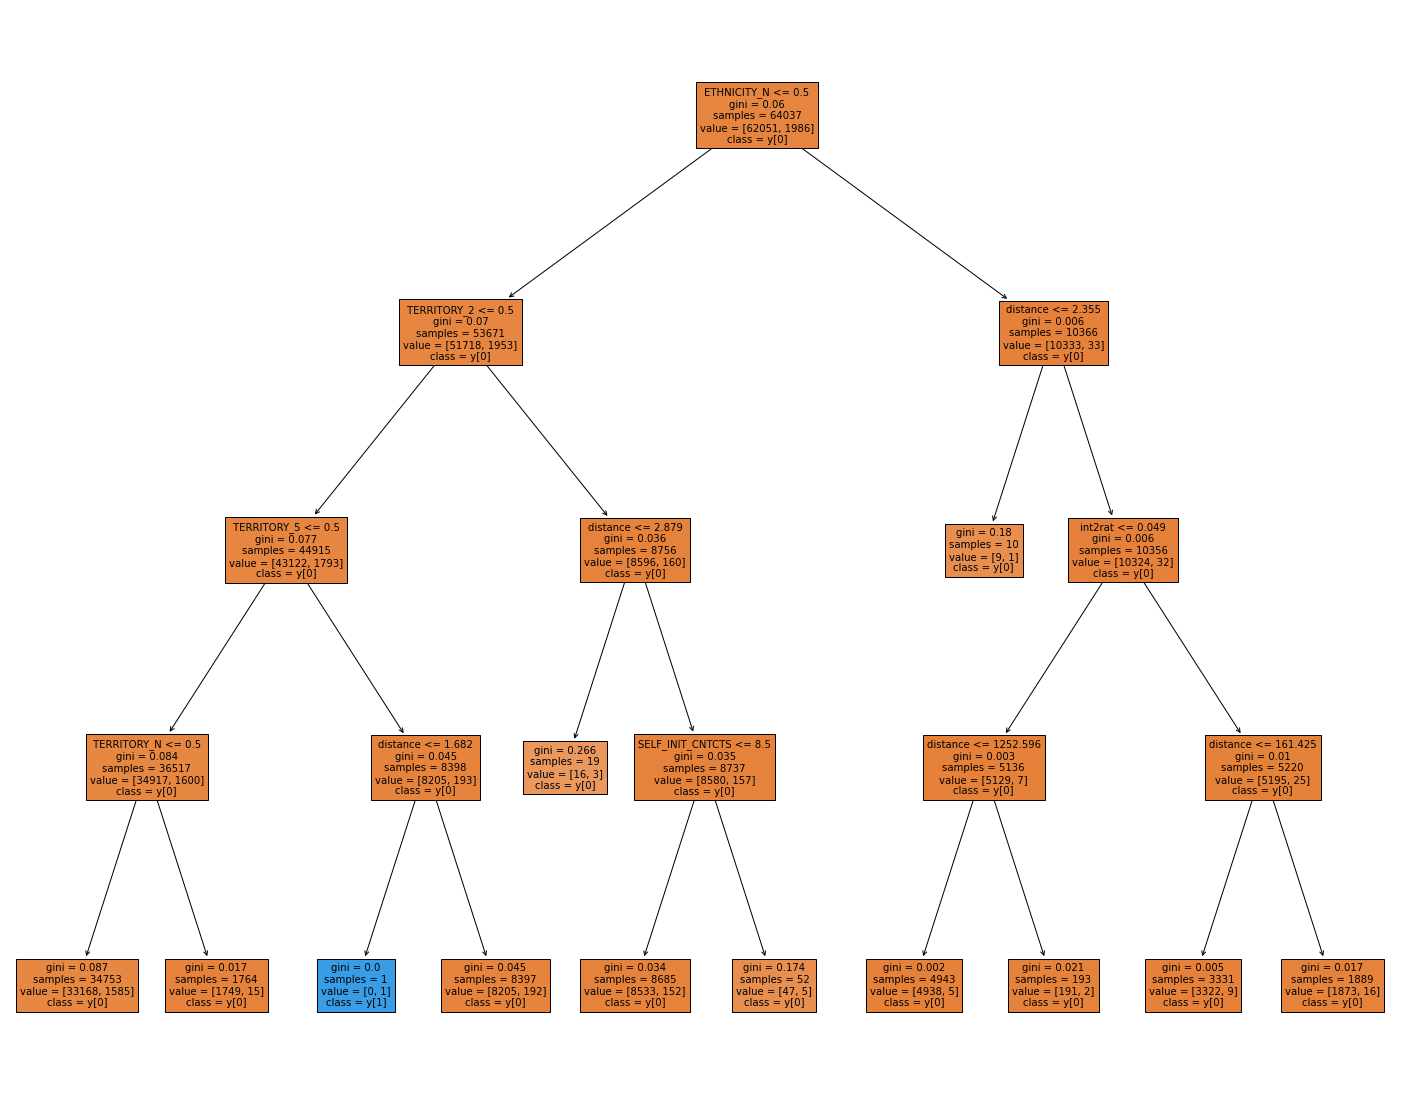

In [36]:
plt.figure(figsize=[25,20])
tree.plot_tree(ap_dtree,
               feature_names=list(ap_X_train.columns.values),
               class_names=True,
               filled=True)
plt.show()

In [37]:
ap_prediction =ap_dtree.predict(ap_X_val)
confusion_matrix(ap_y_val,ap_prediction)

array([[26561,     2],
       [  882,     0]])

In [38]:
ap_dtree.score(ap_X_val,ap_y_val)

0.9677901257059573

In [39]:
ap_prediction_prob = ap_dtree.predict_proba(ap_X_val)
ap_tree_auc = roc_auc_score(ap_y_val, ap_prediction_prob[:,1])
print('Decision Tree: ROC AUC=%.3f' % (ap_tree_auc))

Decision Tree: ROC AUC=0.636


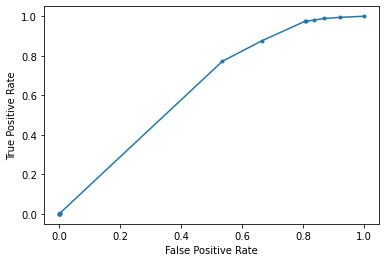

In [40]:
tree_fpr, tree_tpr, _ = roc_curve(ap_y_val, ap_prediction_prob[:,1])
plt.plot(tree_fpr, tree_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()